In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [111]:
# Load data for both production and consumption
production = pd.read_excel('Statistical-Review-of-World-Energy-Data.xlsx', sheet_name='Hydro Generation - TWh')
consumption = pd.read_excel('Statistical-Review-of-World-Energy-Data.xlsx', sheet_name='Hydro Consumption - EJ')

In [112]:
# Provided list of European countries
european_countries_dataset = ['Iceland', 'Norway', 'Sweden', 'Finland']

# Filter both dataframes
country_column_prod = production.columns[0]
european_data_prod = production[production[country_column_prod].isin(european_countries_dataset)]

country_column_cons = consumption.columns[0]
european_data_cons = consumption[consumption[country_column_cons].isin(european_countries_dataset)]

# Filter the data using the 'production' DataFrame
country_column = production.columns[0]
european_data = production[production[country_column].isin(european_countries_dataset)]


In [113]:
# Mapping the years from 2012-2022
year_mapping = {
    'Unnamed: 58': 2022,
    'Unnamed: 57': 2021,
    'Unnamed: 56': 2020,
    'Unnamed: 55': 2019,
    'Unnamed: 54': 2018,
    'Unnamed: 53': 2017,
    'Unnamed: 52': 2016,
    'Unnamed: 51': 2015,
    'Unnamed: 50': 2014,
    'Unnamed: 49': 2013,
    'Unnamed: 48': 2012
}

In [114]:
# Extract relevant columns
european_data_prod = european_data_prod[[country_column_prod] + list(year_mapping.keys())]
european_data_cons = european_data_cons[[country_column_cons] + list(year_mapping.keys())]

# Replace and convert for both dataframes
for df in [european_data_prod, european_data_cons]:
    df.replace('-', 0, inplace=True)
    for col in df.columns[1:]:
        df[col] = df[col].astype(float)
    df.rename(columns=year_mapping, inplace=True)

<ipython-input-114-737a8db12445>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('-', 0, inplace=True)
<ipython-input-114-737a8db12445>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(float)
<ipython-input-114-737a8db12445>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=year_mapping, inplace=True)
<ipython-input-114-737a8

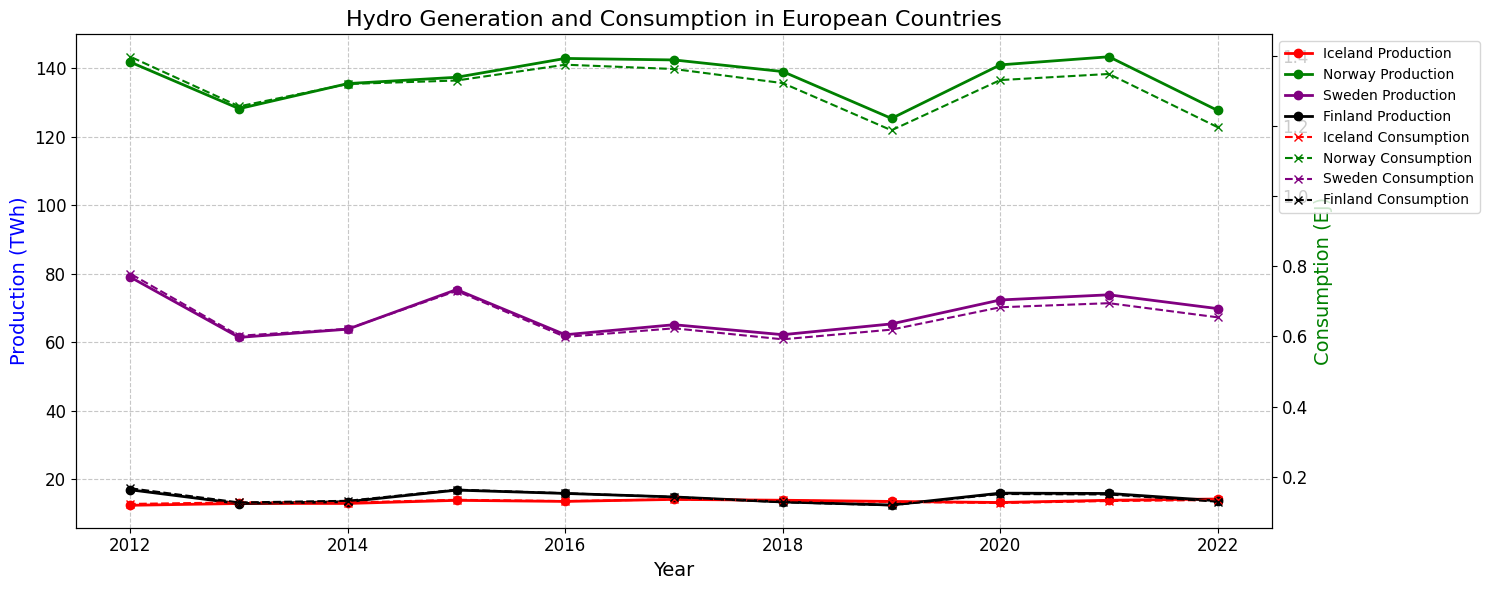

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
years = list(year_mapping.values())
ax1 = plt.gca()  # Primary y-axis for Production
ax2 = ax1.twinx()  # Secondary y-axis for Consumption

# Predefined colors for each country
colors = {
    'Iceland': 'red',
    'Norway': 'green',
    'Sweden': 'purple',
    'Finland': 'black'
}

# Plotting data
for country, color in colors.items():
    prod_data = european_data_prod[european_data_prod[country_column_prod] == country].iloc[0, 1:]
    cons_data = european_data_cons[european_data_cons[country_column_cons] == country].iloc[0, 1:]

    ax1.plot(years, prod_data, color=color, linewidth=2, marker='o', label=f'{country} Production')
    ax2.plot(years, cons_data, color=color, linestyle='--', marker='x', label=f'{country} Consumption')

# Labeling and titling
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Production (TWh)', color='blue', fontsize=14)
ax2.set_ylabel('Consumption (EJ)', color='green', fontsize=14)
ax1.set_title('Hydro Generation and Consumption in European Countries', fontsize=16)

# Grid and aesthetics
ax1.grid(True, linestyle='--', which='both', alpha=0.7)
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)


# Legend settings
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


In [116]:
# Assuming european_data_prod and european_data_cons are your cleaned and pre-processed datasets

# Calculate the mean production and consumption for each country for the years 2012-2022
mean_production = european_data_prod.iloc[:, 1:].mean(axis=1)
mean_consumption = european_data_cons.iloc[:, 1:].mean(axis=1)

# Determine the thresholds
low_prod_threshold = mean_production.quantile(0.25)
moderate_prod_threshold = mean_production.quantile(0.5)
high_prod_threshold = mean_production.quantile(0.75)

low_cons_threshold = mean_consumption.quantile(0.25)
moderate_cons_threshold = mean_consumption.quantile(0.5)
high_cons_threshold = mean_consumption.quantile(0.75)

# Classify based on the thresholds
classification = []

for prod, cons in zip(mean_production, mean_consumption):
    if prod <= low_prod_threshold and cons <= low_cons_threshold:
        classification.append('Class 1: Low hydrogen renewable energy production and consumption')
    elif (prod <= moderate_prod_threshold and cons <= low_cons_threshold) or (cons <= moderate_cons_threshold and prod <= low_prod_threshold):
        classification.append('Class 2: Moderate hydrogen renewable energy production but low consumption (or vice versa)')
    elif (prod <= high_prod_threshold and cons <= moderate_cons_threshold) or (cons <= high_cons_threshold and prod <= moderate_prod_threshold):
        classification.append('Class 3: High hydrogen renewable energy production but moderate consumption (or vice versa)')
    else:
        classification.append('Class 4: Very High hydrogen renewable energy production and consumption')

# Combine classification with country names for clearer output
classified_countries = pd.DataFrame({
    'Country': european_data_prod[country_column_prod],
    'Classification': classification
})

print(classified_countries)


    Country                                     Classification
29  Finland  Class 3: High hydrogen renewable energy produc...
34  Iceland  Class 1: Low hydrogen renewable energy product...
42   Norway  Class 4: Very High hydrogen renewable energy p...
49   Sweden  Class 4: Very High hydrogen renewable energy p...


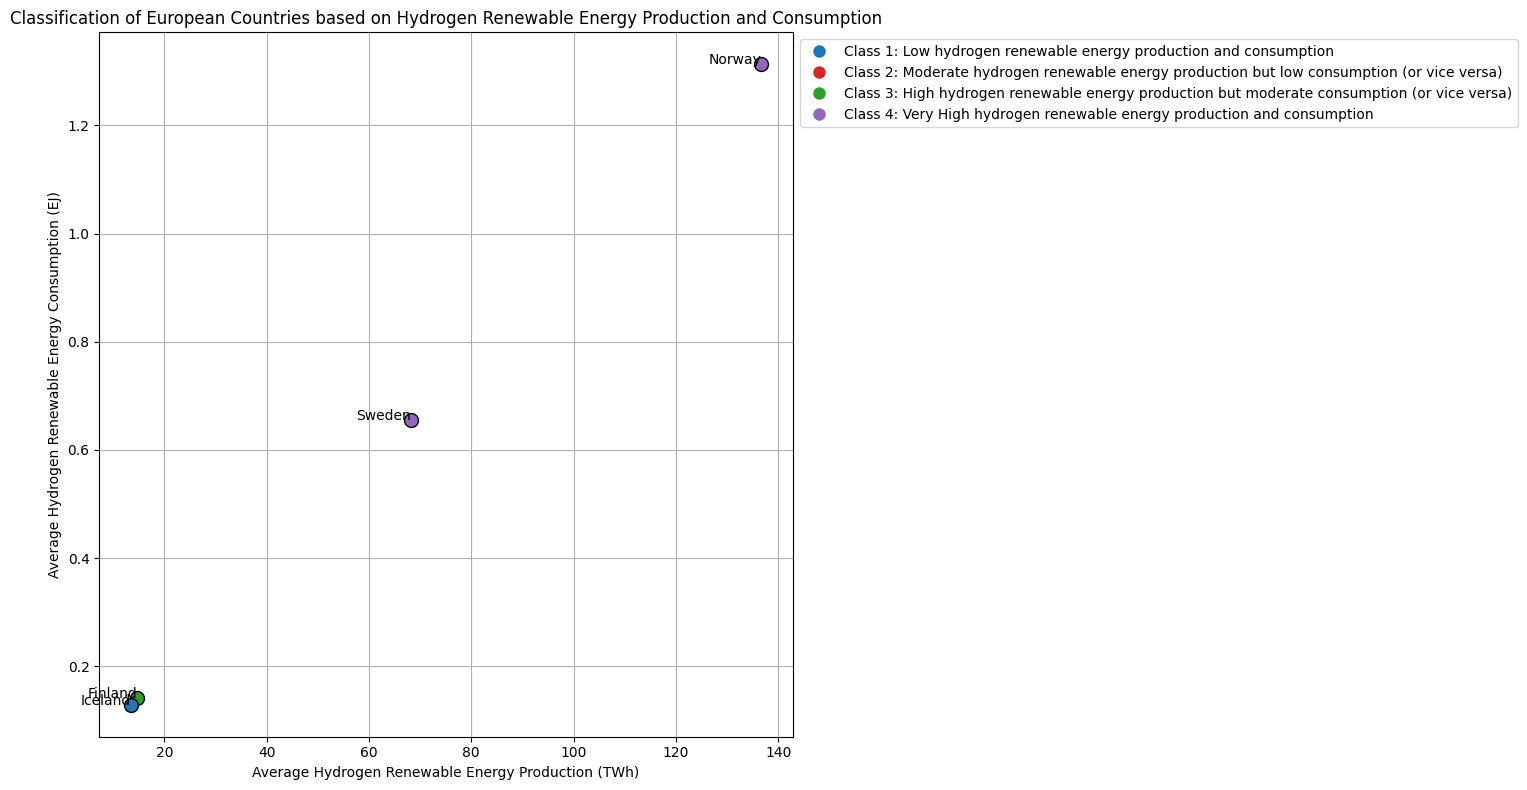

In [117]:
import matplotlib.colors as mcolors

# Assuming the previous code for calculating mean_production, mean_consumption, and classification is already in place

# Define colors for each class
colors = {
    'Class 1: Low hydrogen renewable energy production and consumption': mcolors.TABLEAU_COLORS['tab:blue'],
    'Class 2: Moderate hydrogen renewable energy production but low consumption (or vice versa)': mcolors.TABLEAU_COLORS['tab:red'],
    'Class 3: High hydrogen renewable energy production but moderate consumption (or vice versa)': mcolors.TABLEAU_COLORS['tab:green'],
    'Class 4: Very High hydrogen renewable energy production and consumption': mcolors.TABLEAU_COLORS['tab:purple']
}

# Scatter plot
plt.figure(figsize=(15, 8))
for country, prod, cons, cls in zip(classified_countries['Country'], mean_production, mean_consumption, classification):
    plt.scatter(prod, cons, color=colors[cls], s=100, edgecolor='k', label=f"{country} ({cls})")

# Annotations for country names
for country, prod, cons in zip(classified_countries['Country'], mean_production, mean_consumption):
    plt.annotate(country, (prod, cons), fontsize=10, ha='right')

plt.xlabel('Average Hydrogen Renewable Energy Production (TWh)')
plt.ylabel('Average Hydrogen Renewable Energy Consumption (EJ)')
plt.title('Classification of European Countries based on Hydrogen Renewable Energy Production and Consumption')
plt.grid(True)

# Create a legend for classifications
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[key], markersize=10, label=key) for key in colors]
plt.legend(handles=handles, loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


In [120]:
# Load data for both production and consumption
hydro_production = pd.read_excel('Statistical-Review-of-World-Energy-Data.xlsx', sheet_name='Hydro Generation - TWh')
hydro_consumption = pd.read_excel('Statistical-Review-of-World-Energy-Data.xlsx', sheet_name='Hydro Consumption - EJ')

solar_production = pd.read_excel('Statistical-Review-of-World-Energy-Data.xlsx', sheet_name='Solar Generation - TWh')
solar_consumption = pd.read_excel('Statistical-Review-of-World-Energy-Data.xlsx', sheet_name='Solar Consumption - EJ')


wind_production = pd.read_excel('Statistical-Review-of-World-Energy-Data.xlsx', sheet_name='Wind Generation - TWh')
wind_consumption = pd.read_excel('Statistical-Review-of-World-Energy-Data.xlsx', sheet_name='Wind Consumption - EJ')

In [121]:
# List of European countries for filtering
european_countries_dataset = ['Iceland', 'Norway', 'Sweden', 'Finland']

# Filter Hydro data
hydro_country_column_prod = hydro_production.columns[0]
european_hydro_prod = hydro_production[hydro_production[hydro_country_column_prod].isin(european_countries_dataset)]
hydro_country_column_cons = hydro_consumption.columns[0]
european_hydro_cons = hydro_consumption[hydro_consumption[hydro_country_column_cons].isin(european_countries_dataset)]

# Filter Solar data
solar_country_column_prod = solar_production.columns[0]
european_solar_prod = solar_production[solar_production[solar_country_column_prod].isin(european_countries_dataset)]
solar_country_column_cons = solar_consumption.columns[0]
european_solar_cons = solar_consumption[solar_consumption[solar_country_column_cons].isin(european_countries_dataset)]

# Filter Wind data
wind_country_column_prod = wind_production.columns[0]
european_wind_prod = wind_production[wind_production[wind_country_column_prod].isin(european_countries_dataset)]
wind_country_column_cons = wind_consumption.columns[0]
european_wind_cons = wind_consumption[wind_consumption[wind_country_column_cons].isin(european_countries_dataset)]


In [122]:
# Mapping the years from 2012-2022
year_mapping = {
    'Unnamed: 58': 2022,
    'Unnamed: 57': 2021,
    'Unnamed: 56': 2020,
    'Unnamed: 55': 2019,
    'Unnamed: 54': 2018,
    'Unnamed: 53': 2017,
    'Unnamed: 52': 2016,
    'Unnamed: 51': 2015,
    'Unnamed: 50': 2014,
    'Unnamed: 49': 2013,
    'Unnamed: 48': 2012
}

In [123]:
# Apply year filtering for each energy type

# Hydro
european_hydro_prod = hydro_production[[hydro_production.columns[0]] + [col for col in hydro_production.columns if col in year_mapping]]
european_hydro_cons = hydro_consumption[[hydro_consumption.columns[0]] + [col for col in hydro_consumption.columns if col in year_mapping]]

# Solar
european_solar_prod = solar_production[[solar_production.columns[0]] + [col for col in solar_production.columns if col in year_mapping]]
european_solar_cons = solar_consumption[[solar_consumption.columns[0]] + [col for col in solar_consumption.columns if col in year_mapping]]

# Wind
european_wind_prod = wind_production[[wind_production.columns[0]] + [col for col in wind_production.columns if col in year_mapping]]
european_wind_cons = wind_consumption[[wind_consumption.columns[0]] + [col for col in wind_consumption.columns if col in year_mapping]]

# Replace '-' with 0 and convert to float for all dataframes
for df in [european_hydro_prod, european_hydro_cons, european_solar_prod, european_solar_cons, european_wind_prod, european_wind_cons]:
    df.replace('-', 0, inplace=True)
    for col in df.columns[1:]:
        df[col] = df[col].astype(float)


<ipython-input-123-0f4e768971a5>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('-', 0, inplace=True)
<ipython-input-123-0f4e768971a5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(float)


In [124]:
# After filtering, rename the columns to match the year values


# Hydro
european_hydro_prod.rename(columns=year_mapping, inplace=True)
european_hydro_cons.rename(columns=year_mapping, inplace=True)

# Solar
european_solar_prod.rename(columns=year_mapping, inplace=True)
european_solar_cons.rename(columns=year_mapping, inplace=True)

# Wind
european_wind_prod.rename(columns=year_mapping, inplace=True)
european_wind_cons.rename(columns=year_mapping, inplace=True)

<ipython-input-124-a344546bacd8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  european_hydro_prod.rename(columns=year_mapping, inplace=True)
<ipython-input-124-a344546bacd8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  european_hydro_cons.rename(columns=year_mapping, inplace=True)
<ipython-input-124-a344546bacd8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  european_solar_prod.rename(columns=year_mapping, inplace=True)
<ipy

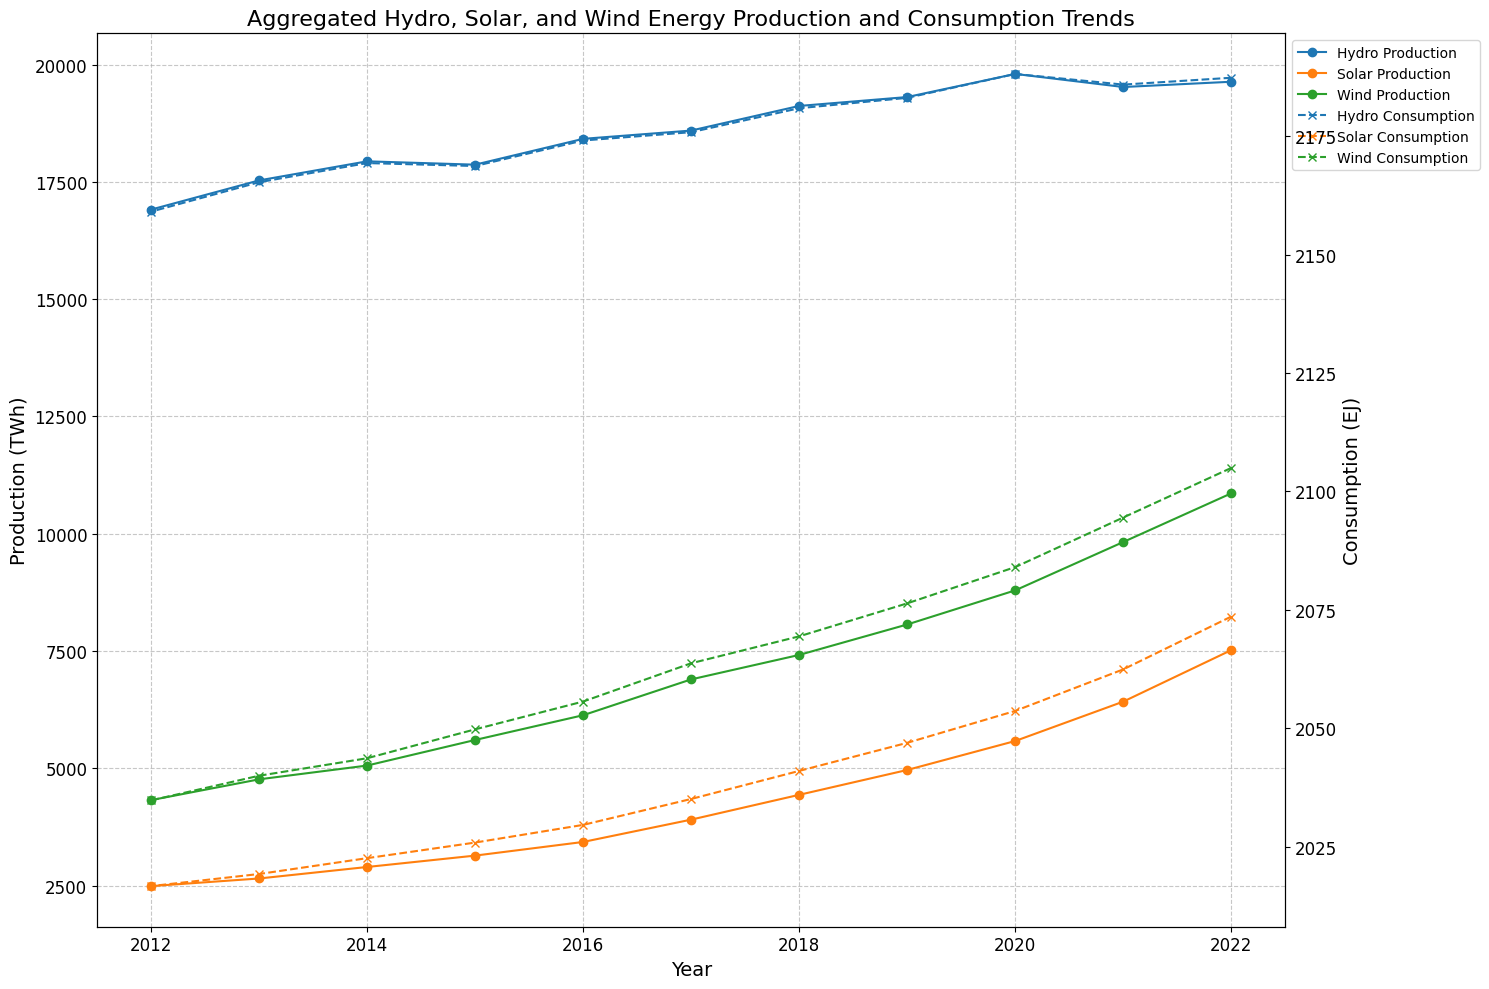

In [125]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'year_mapping' is defined and 'european_countries_dataset' contains the list of countries
years = list(year_mapping.values())  # List of years for plotting

# Initialize empty dataframes for aggregated production and consumption
aggregated_prod = pd.DataFrame(index=years)
aggregated_cons = pd.DataFrame(index=years)

# Sum data for hydro, solar, and wind for each year across all countries
for energy_type, (prod_df, cons_df) in {
        'Hydro': (european_hydro_prod, european_hydro_cons),
        'Solar': (european_solar_prod, european_solar_cons),
        'Wind': (european_wind_prod, european_wind_cons)}.items():

    # Sum production and consumption across countries for each year
    aggregated_prod[energy_type] = prod_df[years].sum(axis=0)
    aggregated_cons[energy_type] = cons_df[years].sum(axis=0)

# Plotting aggregated data
plt.figure(figsize=(15, 10))
ax1 = plt.gca()  # Primary y-axis for Production in TWh
ax2 = ax1.twinx()  # Secondary y-axis for Consumption in EJ

# Plot production and consumption data
for energy_type in ['Hydro', 'Solar', 'Wind']:
    ax1.plot(aggregated_prod.index, aggregated_prod[energy_type], label=f'{energy_type} Production', marker='o')
    ax2.plot(aggregated_cons.index, aggregated_cons[energy_type], label=f'{energy_type} Consumption', linestyle='--', marker='x')

# Labeling and titling
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Production (TWh)', fontsize=14)
ax2.set_ylabel('Consumption (EJ)', fontsize=14)
ax1.set_title('Aggregated Hydro, Solar, and Wind Energy Production and Consumption Trends', fontsize=16)

# Grid and aesthetics
ax1.grid(True, linestyle='--', which='both', alpha=0.7)
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)

# Legend settings
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


In [ ]:
# Load data "Panel-format" for stats such as country, population, year,
stats = pd.read_excel('Panel-format.xlsx', sheet_name='EI Statistical Review 2023')